# 6.3 Mini-project: Applying supervised learning to predict student dropout

**Welcome to your Mini-project: Applying supervised learning to predict student dropout rate**

In this project, we will examine student data and use supervised learning techniques to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.

You will work with the data in three distinct stages:

1.  Applicant and course information
2.  Student and engagement data
3.  Academic performance data

These stages reflect Study Group’s real-world data journey and how student information has progressed and become available. Additionally, this approach enables you, through data exploration, to support Study Group in better understanding and identifying key metrics to monitor. This approach will also assist you in determining at which stage of the student journey interventions would be most effective.

Please set aside approximately **12 hours** to complete the mini-project.

## Business context
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment.

Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.

Study Group has provided you with 3 data sets.


## Objective
By the end of this mini-project, you will have developed the skills and knowledge to apply advanced machine learning techniques to create a predictive model for student dropout. This project will involve comprehensive data exploration, preprocessing, and feature engineering to ensure high-quality input for the models. You will employ and compare multiple predictive algorithms, such as XGBoost, and a neural network-based model, to determine the most effective model for predicting student dropout.

In the Notebook, you will:
- explore the data sets, taking a phased approach
- preprocess the data and conduct feature engineering
- predict the dropout rate using XGBoost, and a neural network-based model.

You will also write a report summarising the results of your findings and recommendations.

## Assessment criteria
By completing this project, you’ll be able to provide evidence that you can:

- develop accurate predictions across diverse organisational scenarios by building and testing advanced ML models
- inform data-driven decision-making with advanced machine learning algorithms and models
- propose and present effective solutions to organisational problems using data preprocessing, model selection, and insightful analysis techniques.

## Project guidance
1.   Navigate to **Mini-project 6.3 Applying supervised learning to predict student dropout**, and save a copy of the activity Notebook to your Drive.

2. Please refer to the Rubric for specific steps to be performed as part of the project activity. Every step mentioned in the rubric will be assessed separately.

3. When you’ve completed the activity:
  - download your completed Notebook as an IPYNB (Jupyter Notebook) or PY (Python) file
  - save the file as follows: **LastName_FirstName_CAM_C201_Week_6_Mini-project**.

4. Prepare a detailed report (800–1,000 words) that includes an overview of your approach, a description of your analysis, and an explanation of the insights you identified - Please refer to the Rubric for further details that should form a part of your analysis and report. Save the document as a PDF named according to the following convention: **LastName_FirstName_CAM_C201_W6_Mini-project.pdf**.

5. Submit your Notebook and PDF document.




In [1]:
import xgboost as xgb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, make_scorer, recall_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

In [2]:
random_seed = 0

# Stage 1 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1pA8DDYmQuaLyxADCOZe1QaSQwF16q1J6"  # --------------- Downloaded file to work on local machine

stage_1 = pd.read_csv(file_url)

**Stage 1: Pre-processing instructions**
- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with > 50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.

In [ ]:
stage_1.head()

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen


In [ ]:
stage_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CentreName             25059 non-null  object
 1   LearnerCode            25059 non-null  int64 
 2   BookingType            25059 non-null  object
 3   LeadSource             25059 non-null  object
 4   DiscountType           7595 non-null   object
 5   DateofBirth            25059 non-null  object
 6   Gender                 25059 non-null  object
 7   Nationality            25059 non-null  object
 8   HomeState              8925 non-null   object
 9   HomeCity               21611 non-null  object
 10  CourseLevel            25059 non-null  object
 11  CourseName             25059 non-null  object
 12  IsFirstIntake          25059 non-null  bool  
 13  CompletedCourse        25059 non-null  object
 14  ProgressionDegree      24184 non-null  object
 15  ProgressionUniversi

**Analysis:**

To figure out features are redundant we have to look at the overall purpose of this **first stage** of the project: Identifying at-risk students PRIOR to the start of their courses. Based on this, we can justify whether a feature is necessary for the analysis or not.

**LearnerCode:** This feature gives unique identifiers and does not give any indication of a student's likelihood of completing their course.

**CentreName:** This feature could be useful for other analyses, such as determining success rate of different centres but for individual students, it is not relevant. The same thing applies for **BookingType** and **LeadSource**.

**ProgressionDegree & ProgressionUniversity:** These features concern future progression and are therefore not relevant to the success of a student in their current course.

The rest of the features have more potential to be useful in flagging at-risk students.

In [ ]:
# dropping columns: 'LearnerCode', 'CentreName', 'BookingType', 'ProgressionDegree', and 'ProgressionUniversity'
stage_1.drop(['LearnerCode', 'CentreName', 'BookingType', 'LeadSource', 'ProgressionDegree', 'ProgressionUniversity'], axis=1, inplace=True)
stage_1.head()

,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse
0,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes
1,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes
2,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes
3,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes
4,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes


In [ ]:
stage_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DiscountType     7595 non-null   object
 1   DateofBirth      25059 non-null  object
 2   Gender           25059 non-null  object
 3   Nationality      25059 non-null  object
 4   HomeState        8925 non-null   object
 5   HomeCity         21611 non-null  object
 6   CourseLevel      25059 non-null  object
 7   CourseName       25059 non-null  object
 8   IsFirstIntake    25059 non-null  bool  
 9   CompletedCourse  25059 non-null  object
dtypes: bool(1), object(9)
memory usage: 1.7+ MB


In [ ]:
# Checking cardinality of columns (high cardinality = 201+ unique values, as per guidance)

# Check for unique values in each column
for col in stage_1.columns:
    print(col, stage_1[col].nunique())

DiscountType 11
DateofBirth 4705
Gender 2
Nationality 151
HomeState 2448
HomeCity 5881
CourseLevel 4
CourseName 172
IsFirstIntake 2
CompletedCourse 2


**Analysis**
There are 3 features left that contain more that 200 unique values: **Date of Birth, Home State, and HomeCity**.

**Date of birth** can be converted in to **Age** to reduce the cardinality but the others cannot be reduced further and therefore need to be removed from the data set.

In [ ]:
stage_1['DateofBirth'][0]

'13/01/1998'

In [ ]:
# Convert date of birth column to datetime
stage_1['DateofBirth'] = pd.to_datetime(stage_1['DateofBirth'], dayfirst=True)

# Calcualte age
stage_1['Age'] = (pd.to_datetime('today') - stage_1['DateofBirth']).dt.days // 365

In [ ]:
# moving the age column to the 5th column
age = stage_1.pop('Age')
stage_1.insert(4, 'Age', age)


In [ ]:
stage_1.head()

,DiscountType,DateofBirth,Gender,Nationality,Age,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse
0,NaN,1998-01-13,Male,Chinese,27,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes
1,NaN,1998-02-12,Male,Chinese,27,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes
2,NaN,2000-04-07,Male,Chinese,24,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes
3,NaN,1999-05-18,Male,Chinese,25,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes
4,NaN,1996-04-19,Male,Chinese,28,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes


In [ ]:
# drop high cardniality columns
stage_1.drop(['DateofBirth', 'HomeState', 'HomeCity'], axis=1, inplace=True)

In [ ]:
stage_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DiscountType     7595 non-null   object
 1   Gender           25059 non-null  object
 2   Nationality      25059 non-null  object
 3   Age              25059 non-null  int64 
 4   CourseLevel      25059 non-null  object
 5   CourseName       25059 non-null  object
 6   IsFirstIntake    25059 non-null  bool  
 7   CompletedCourse  25059 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 1.4+ MB


In [ ]:
# detecting columns with more than 50% missing values
for col in stage_1.columns:
    print(col, ': ', stage_1[col].isnull().sum() > 0.5 * stage_1.shape[0])

DiscountType :  True
Gender :  False
Nationality :  False
Age :  False
CourseLevel :  False
CourseName :  False
IsFirstIntake :  False
CompletedCourse :  False


**Analysis:**
Only one feature has more than 50% missing data: **DiscountType**. It will be removed from the data set.

In [ ]:
stage_1.drop('DiscountType', axis=1, inplace=True)

In [ ]:
stage_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           25059 non-null  object
 1   Nationality      25059 non-null  object
 2   Age              25059 non-null  int64 
 3   CourseLevel      25059 non-null  object
 4   CourseName       25059 non-null  object
 5   IsFirstIntake    25059 non-null  bool  
 6   CompletedCourse  25059 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
stage_1.head()

,Gender,Nationality,Age,CourseLevel,CourseName,IsFirstIntake,CompletedCourse
0,Male,Chinese,27,Pre-Masters,Business and Law Pre-Masters,True,Yes
1,Male,Chinese,27,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes
2,Male,Chinese,24,International Year Two,Business Management and Finance International ...,False,Yes
3,Male,Chinese,25,International Year Two,Business Management and Finance International ...,True,Yes
4,Male,Chinese,28,Pre-Masters,Business and Law Pre-Masters,True,Yes


In [ ]:
# Cardniality check
for col in stage_1.columns:
    print(col, stage_1[col].nunique())

Gender 2
Nationality 151
Age 38
CourseLevel 4
CourseName 172
IsFirstIntake 2
CompletedCourse 2


**Analysis:** For the next part, we want to encode the categorical and ordinal data to be more compatible for the classification models. This means performing ordinal encoding for the ordinal data and one-hot encoding for the other categorical data.

I will use an additional method for preparing the features **Nationality and CourseName** for the NN classifier since they have a higher cardinality. Thie method is called feature embedding and is used to reduce the dimensionality of high cardinality categorical features where one-hot encoding would be dimensionally very inefficient.

The categorical features are: **Gender, Nationality, CourseName, and IsFirstIntake**. Gender will be **one-hot encoded** as it is categorical, IsFirstIntake will be a binary value (0/1). For XGBoost, Nationality and CourseName will become a **categorical** dtype, as this method supports categorical features. However, these two features will undergo **feature embedding** when training the NN.

The ordinal features are: **CourseLevel and Age**. Since Age is already a numerical feature, it will remain as is. CourseLevel will be **ordinal encoded**.

In [ ]:
stage_1['CourseLevel'].value_counts()

CourseLevel
Foundation                14666
Pre-Masters                5905
International Year One     4441
International Year Two       47
Name: count, dtype: int64

In [ ]:
# PREPARING DATA FOR MODELS

xgb_encoded_s1 = stage_1.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
xgb_encoded_s1['IsFirstIntake'] = xgb_encoded_s1['IsFirstIntake'].astype(int)
xgb_encoded_s1['CompletedCourse'] = xgb_encoded_s1['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
xgb_encoded_s1['CourseLevel'] = xgb_encoded_s1['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
xgb_encoded_s1 = pd.get_dummies(xgb_encoded_s1, columns=['Gender'])
xgb_encoded_s1['Gender_Female'] = xgb_encoded_s1['Gender_Female'].astype(int)
xgb_encoded_s1['Gender_Male'] = xgb_encoded_s1['Gender_Male'].astype(int)

# Encoding Nationality and CourseName to individual categories
xgb_encoded_s1['Nationality'] = xgb_encoded_s1['Nationality'].astype('category')
xgb_encoded_s1['CourseName'] = xgb_encoded_s1['CourseName'].astype('category')

# Drop nationality
# xgb_encoded_s1.drop('Nationality', axis=1, inplace=True)

# xgb_encoded_s1.head()

/var/folders/12/wd9t8m850v12fpd_v81hh2hm0000gn/T/ipykernel_64977/2191624091.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_encoded_s1['CompletedCourse'] = xgb_encoded_s1['CompletedCourse'].replace({'Yes': 1, 'No': 0})


In [ ]:
# Train test split
X = xgb_encoded_s1.drop('CompletedCourse', axis=1)
y = xgb_encoded_s1['CompletedCourse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

In [ ]:
# Ensuring class imbalance is represented in train and test targets
print('Train data')
print(y_train.value_counts(normalize=True))
print('Test data')
print(y_test.value_counts(normalize=True))

Train data
CompletedCourse
1    0.850202
0    0.149798
Name: proportion, dtype: float64
Test data
CompletedCourse
1    0.85016
0    0.14984
Name: proportion, dtype: float64


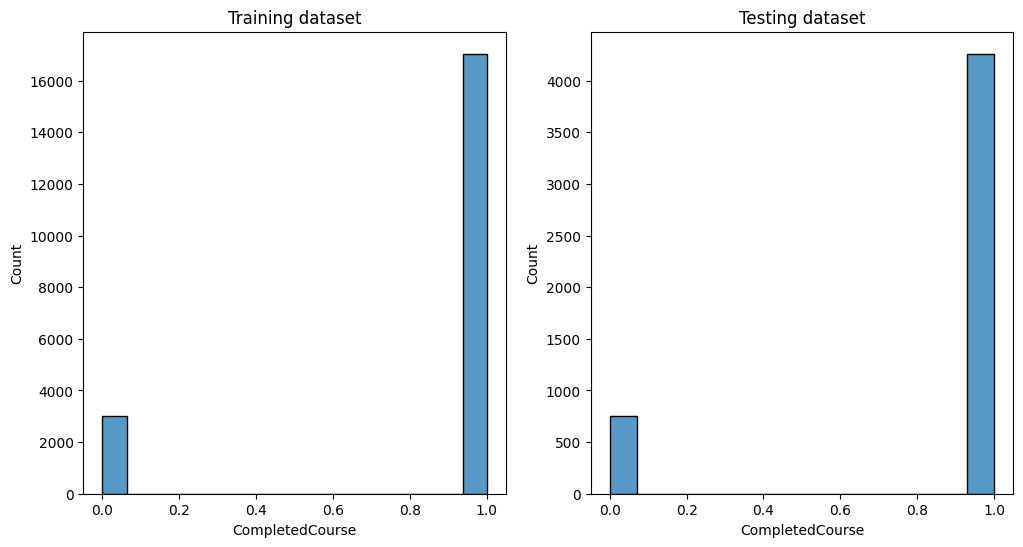

In [ ]:
# checking that the label distribution is equal in test and train data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_train, ax=ax[0])
ax[0].set_title('Training dataset')
sns.histplot(y_test, ax=ax[1])
ax[1].set_title('Testing dataset')
plt.show()

**Analysis:** Stratifying the train-test split, ensures that the distribution of the target label is represented equally in the training and testing data. This is confirmed by the bar plots above.

In [ ]:
# TRAIN XGBOOST CLASSIFIER
xgb_clf = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# CLASSIFY

y_pred = xgb_clf.predict(X_test)

XGBoost Accuracy: 0.8929
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.67      0.57      0.61       751
           1       0.93      0.95      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.80      0.76      0.78      5012
weighted avg       0.89      0.89      0.89      5012

AUC: 0.7582


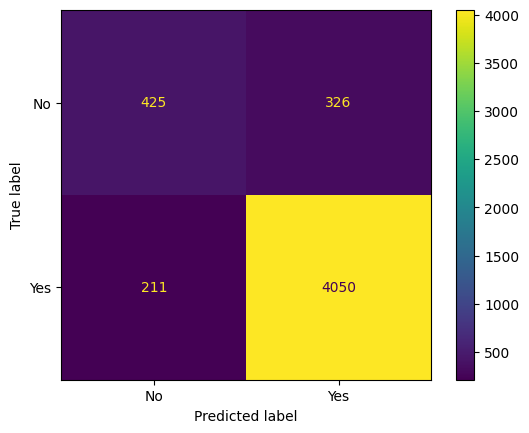

In [ ]:
# EVALUATE

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

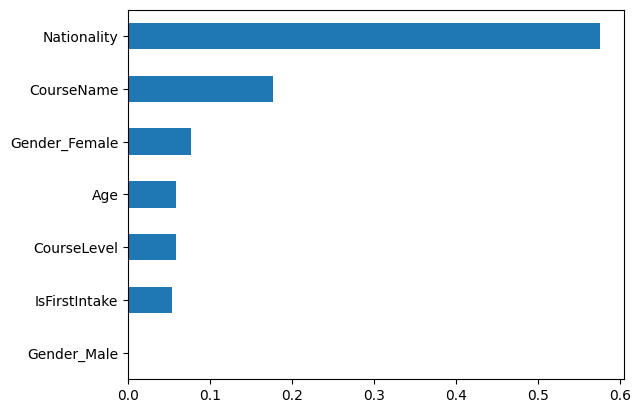

In [ ]:
feature_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

**Analysis:** The model was capable of classifying passing students with a high precision but identifying at-risk students was less successful. This is not good since it is the at-risk students we are trying to identify first and foremost.

Looking at the feature importance in the XGBoost model's classification procedure, it is clear that Nationality is by far the dominant deciding feature. This could indicate **overfitting** which needs to be tackled. The simplest way to tackle this issue is to evaluate the model performance when nationality is removed.

Removing the **Nationality** feature showed a drop in performance, indicating that nationality does have a genuine contribution to the prediction performance and would therefore not be overfitting.

The most appropriate method at this point to improve model performance. To do this, the next step will be hyperparameter tuning. The parameters being tuned will be **learning rate, max depth, and number of estimators**

**Learing rate:** determines how much the model adjusts in each boosting step.

**Max depth:** Controls how deep each decision tree is allowed to grow. Decreasing this parameter can also help with overfitting.

**Number of estomators:** Determines how many trees to train.

In [ ]:
# HYPERPARAMETER TUNING

parameter_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]
}

# Tuned model
xgb_clf_tuned = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed)

grid_search = GridSearchCV(
    estimator=xgb_clf_tuned,
    param_grid=parameter_grid,
    scoring='roc_auc', # imbalanced dataset
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [ ]:
# results_df = pd.DataFrame(grid_search.cv_results_)
# results_df.sort_values(by='mean_test_score').head()

In [ ]:
# evaluate the model with the best parameters
xgb_clf_tuned = grid_search.best_estimator_

In [ ]:
xgb_clf_tuned

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_clf_tuned.predict(X_test)

XGBoost Accuracy: 0.8964
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       751
           1       0.93      0.96      0.94      4261

    accuracy                           0.90      5012
   macro avg       0.81      0.76      0.78      5012
weighted avg       0.89      0.90      0.89      5012

AUC: 0.7581


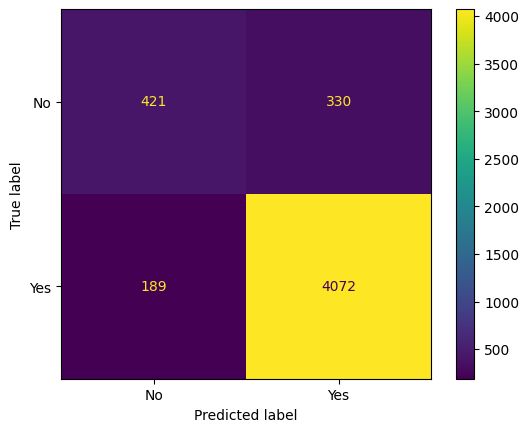

In [ ]:
# EVALUATE

# confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

**Analysis:** The peformance between the tuned and the raw model is very similar. Recall and AUC decreased slightly but all other metrics either increased or stayed the same. That being said, the amount by which these increases/decreases happened are minimal. The AUC of 0.758 indicates a decent classifier.

## Neural Network

In [ ]:
# PREPARING DATA FOR NN

nn_encoded_s1 = stage_1.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
nn_encoded_s1['IsFirstIntake'] = nn_encoded_s1['IsFirstIntake'].astype(int)
nn_encoded_s1['CompletedCourse'] = nn_encoded_s1['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
nn_encoded_s1['CourseLevel'] = nn_encoded_s1['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
nn_encoded_s1 = pd.get_dummies(nn_encoded_s1, columns=['Gender'])
nn_encoded_s1['Gender_Female'] = nn_encoded_s1['Gender_Female'].astype(int)
nn_encoded_s1['Gender_Male'] = nn_encoded_s1['Gender_Male'].astype(int)

# Encoding Nationality and CourseName
# Nationality
nat_encoder = LabelEncoder()
nn_encoded_s1['Nationality_ID'] = nat_encoder.fit_transform(nn_encoded_s1['Nationality'])
# CourseName
course_encoder = LabelEncoder()
nn_encoded_s1['CourseName_ID'] = course_encoder.fit_transform(nn_encoded_s1['CourseName'])

# removing the old columns
nn_encoded_s1.drop(columns=['Nationality', 'CourseName'], inplace=True)

# nn_encoded_s1.head()

# Train test split
X = nn_encoded_s1.drop('CompletedCourse', axis=1)
y = nn_encoded_s1['CompletedCourse']

# train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
# train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=random_seed, stratify=y_train_full)

/var/folders/12/wd9t8m850v12fpd_v81hh2hm0000gn/T/ipykernel_64977/302060805.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nn_encoded_s1['CompletedCourse'] = nn_encoded_s1['CompletedCourse'].replace({'Yes': 1, 'No': 0})


In [ ]:
# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

embedding_dim = 10

# Inputs
nationality_input = Input(shape=(1,), name='Nationality_In')
course_input = Input(shape=(1,), name='Course_In')
# all features except the embedded ones
other_input = Input(shape=(X_train.shape[1] - 2,), name='Other_Features_In')

# Embeddings
# Nationality
nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
nationality_embedding = Flatten()(nationality_embedding) # flatten to turn into 'layer'

# Course
course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
course_embedding = Flatten()(course_embedding)
# Concat inputs
input = Concatenate()([nationality_embedding, course_embedding, other_input])

# Dense layers
x = Dense(32, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)

# OUtput layer
output = Dense(1, activation='sigmoid', name="Output")(x)

# Create Model
model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['AUC'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Nationality_In      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_In           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Nationality_Embedd… │ (None, 1, 10)     │      1,510 │ Nationality_In[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_Embedding    │ (None, 1, 10)     │      1,720 │ Course_In[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 10)        │          0 │ Nationality_Embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 10)        │          0 │ Course_Embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Other_Features_In   │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 25)        │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ flatten_7[0][0],  │
│                     │                   │            │ Other_Features_I… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │        832 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │        528 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 16)        │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         17 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,607 (18.00 KB)

 Trainable params: 4,607 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.4811 - loss: 1.6706 - val_AUC: 0.5347 - val_loss: 0.4672
Epoch 2/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.4907 - loss: 0.8389 - val_AUC: 0.6609 - val_loss: 0.4158
Epoch 3/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5141 - loss: 0.6307 - val_AUC: 0.7675 - val_loss: 0.3990
Epoch 4/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5250 - loss: 0.5631 - val_AUC: 0.7964 - val_loss: 0.3983
Epoch 5/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5653 - loss: 0.5016 - val_AUC: 0.7818 - val_loss: 0.4017
Epoch 6/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.5934 - loss: 0.4602 - val_AUC: 0.8204 - val_loss: 0.3941
Epoch 7/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6250 - loss: 0.4297 - val_AUC: 0.8373 - val_loss: 0.3827
Epoch 8/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6820 - loss: 0.4202 - val_AUC: 0.8491 - val_loss: 0.3598
Epoch 9/25
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AU

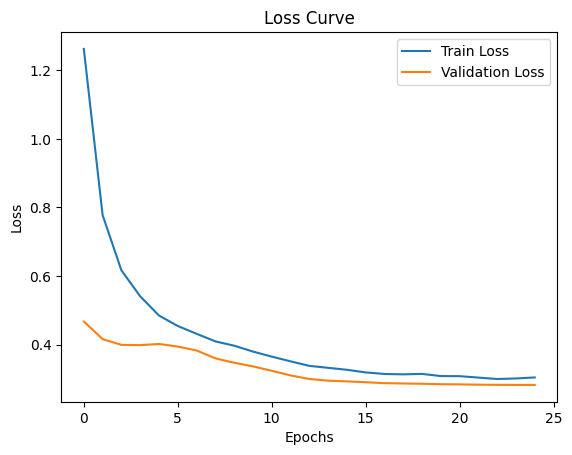

In [ ]:
# TRAINING
# Train data
X_nationality = X_train['Nationality_ID']
X_course = X_train['CourseName_ID']
X_other = X_train.drop(columns=['Nationality_ID', 'CourseName_ID'])

# test and validation data
X_test_nationality, X_val_nationality = X_test['Nationality_ID'], X_val['Nationality_ID']
X_test_course, X_val_course = X_test['CourseName_ID'], X_val['CourseName_ID']
X_test_other, X_val_other = X_test.drop(columns=['Nationality_ID', 'CourseName_ID']), X_val.drop(columns=['Nationality_ID', 'CourseName_ID'])

nn_model = model.fit(
    [X_nationality, X_course, X_other],
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val)
)

# Plot training & validation accuracy/loss
plt.plot(nn_model.history['loss'], label='Train Loss')
plt.plot(nn_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
# classify
y_pred = model.predict([X_test_nationality, X_test_course, X_test_other])
y_pred = (y_pred > 0.5).astype(int)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


NN Accuracy: 0.8873


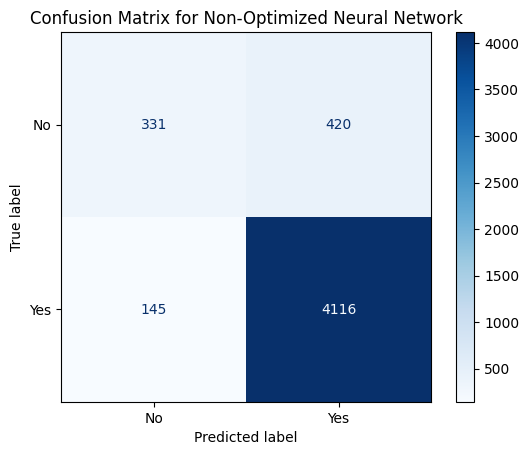

              precision    recall  f1-score   support

           0       0.70      0.44      0.54       751
           1       0.91      0.97      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.80      0.70      0.74      5012
weighted avg       0.88      0.89      0.88      5012

AUC: 0.7034


In [ ]:
# EVALUATE

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'NN Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Non-Optimized Neural Network")
plt.show()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

In [ ]:
# HYPERPARAMETER TUNING

# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

def build_model(hp):
    """
    This function builds a neural network model with specified hyperparameters.
    """
    embedding_dim = hp.Int('embedding_dim', min_value=5, max_value=25, step=5)

    # Inputs
    nationality_input = Input(shape=(1,), name='Nationality_In')
    course_input = Input(shape=(1,), name='Course_In')
    other_input = Input(shape=(X_train_full.shape[1] - 2,), name='Other_Features_In')

    # Embeddings
    nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
    nationality_embedding = Flatten()(nationality_embedding)

    course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
    course_embedding = Flatten()(course_embedding)

    # Combine all inputs
    merged = Concatenate()([nationality_embedding, course_embedding, other_input])

    # Tune number of neurons per layer
    x = Dense(
        hp.Int('units_1', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation_1', ['relu', 'tanh', 'leaky_relu'])
    )(merged)

    # Tune dropout rate
    x = Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)

    x = Dense(
        hp.Int('units_2', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation_2', ['relu', 'tanh', 'leaky_relu'])
    )(x)

    x = Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Output layer
    output = Dense(1, activation='sigmoid', name="Output")(x)

    # Tune optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])

    model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    return model


In [ ]:
# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_auc',  # Optimize for AUC
    max_trials=20,  # Number of different hyperparameter combinations to test
    executions_per_trial=2,  # Run each trial multiple times to get stable results
    directory='keras_tuner_results',
    project_name='nn_hyperparameter_tuning'
)

# Perform Hyperparameter Search
tuner.search(
    [X_nationality, X_course, X_other],
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=20,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', mode='max', patience=5, restore_best_weights=True)]
)

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
Embedding Dimension: {best_hps.get('embedding_dim')}
Units Layer 1: {best_hps.get('units_1')}
Activation Layer 1: {best_hps.get('activation_1')}
Dropout Layer 1: {best_hps.get('dropout_1')}
Units Layer 2: {best_hps.get('units_2')}
Activation Layer 2: {best_hps.get('activation_2')}
Dropout Layer 2: {best_hps.get('dropout_2')}
Optimizer: {best_hps.get('optimizer')}
""")

# Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_nationality, X_course, X_other],
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', patience=5)]
)

# Evaluate performance on test set
test_auc = best_model.evaluate([X_test_nationality, X_test_course, X_test_other], y_test)[1]
print(f"Final Test AUC: {test_auc:.4f}")

Trial 20 Complete [00h 00m 27s]
val_auc: 0.8504492044448853

Best val_auc So Far: 0.8754047453403473
Total elapsed time: 00h 27m 24s

Best hyperparameters:
Embedding Dimension: 10
Units Layer 1: 48
Activation Layer 1: tanh
Dropout Layer 1: 0.2
Units Layer 2: 128
Activation Layer 2: relu
Dropout Layer 2: 0.4
Optimizer: rmsprop

Epoch 1/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - auc: 0.6567 - loss: 0.3908 - val_auc: 0.8686 - val_loss: 0.2857
Epoch 2/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8589 - loss: 0.2924 - val_auc: 0.8715 - val_loss: 0.2861
Epoch 3/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8643 - loss: 0.2830 - val_auc: 0.8721 - val_loss: 0.2789
Epoch 4/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8680 - loss: 0.2826 - val_auc: 0.8728 - val_loss: 0.2796
Epoch 5/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - auc: 0.8624 - loss: 0.2880 - val_auc: 0.8732 - val_loss: 0.2779
Epoch 6/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 0.8749 - loss: 0.2799 

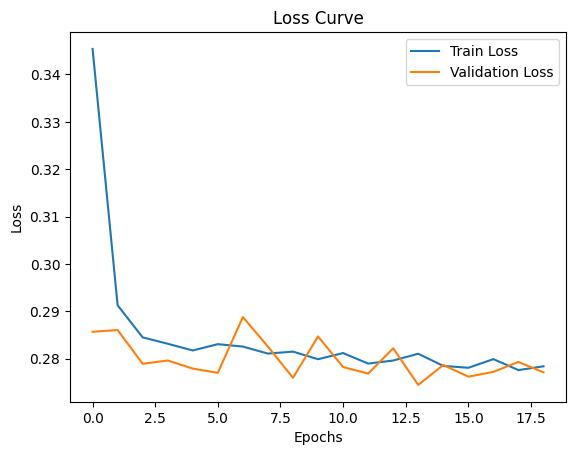

In [ ]:
# plot the loss of the model
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step
0.8894652833200319


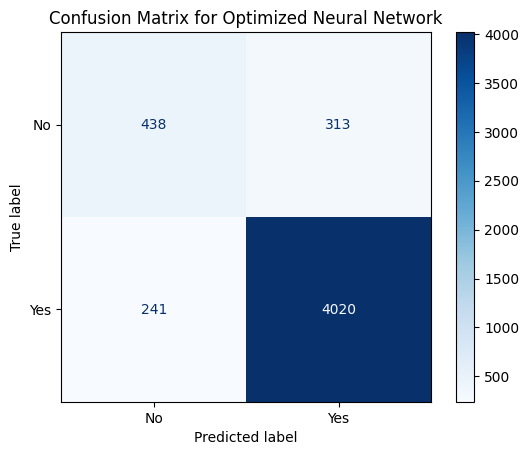

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       751
           1       0.93      0.94      0.94      4261

    accuracy                           0.89      5012
   macro avg       0.79      0.76      0.77      5012
weighted avg       0.89      0.89      0.89      5012

AUC: 0.8734


In [ ]:
# EVALUATE
y_pred_prob = best_model.predict([X_test_nationality, X_test_course, X_test_other])

# Convert probabilities to binary class labels (threshold at 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap="Blues")
plt.title("Confusion Matrix for Optimized Neural Network")
plt.show()

print(classification_report(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

print(f'AUC: {auc_score:.4f}')

**Analysis:** While **Accuracy** remained relatively the same (optimal model slightly better), there are some significant improvements on other fronts. The **F1-score** of students who dropped out improved while that of the ones who did not drop out, remained the same. This means that the model got better at identifying at-risk students. This is further noted by the **AUC** which improved to an impressive 0.8734, indicating that the classifier performs well regardless of class imbalances. The fact that the AUC is similar to the validation AUC further indicates that the model is generalizing well.

# Stage 2 data

In [ ]:
# File URL
file_url = "https://drive.google.com/uc?id=1vy1JFQZva3lhMJQV69C43AB1NTM4W-DZ"

stage_2 = pd.read_csv(file_url)
stage_2.head()

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,Pre-Masters,Business and Law Pre-Masters,True,Yes,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,International Year Two,Business Management and Finance International ...,False,Yes,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,International Year Two,Business Management and Finance International ...,True,Yes,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,Pre-Masters,Business and Law Pre-Masters,True,Yes,MSc International Business Management,University of Aberdeen,NaN,NaN


**Stage 2: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.



In [ ]:
for col in stage_2.columns:
    print(col, stage_2[col].nunique())

CentreName 19
LearnerCode 24877
BookingType 2
LeadSource 7
DiscountType 11
DateofBirth 4705
Gender 2
Nationality 151
HomeState 2448
HomeCity 5881
CourseLevel 4
CourseName 172
IsFirstIntake 2
CompletedCourse 2
ProgressionDegree 2616
ProgressionUniversity 40
AuthorisedAbsenceCount 190
UnauthorisedAbsenceCount 258


**Analysis:** Because we are still predicting the likelihood of a student dropping out, the same features become redundant as in **stage 1**. For this reason, they will all be removed.

Furthermore **DOB** will also be engineered to **Age** and all features with more than 50% missing data will be removed.

However, there is an exception to the cardinality rule this time. Even though **UnauthorisedAbsenceCount** has more than 200 unique values, it is a feature that is essential for this part of tge analysis and will therefore be kept. Furthermore, this will not be an issue since it is numerical, meaning that the cardinality will not affect the dimensionality of the model input.

In [ ]:
stage_2.drop(['LearnerCode', 'CentreName', 'BookingType', 'LeadSource', 'ProgressionDegree', 'ProgressionUniversity'], axis=1, inplace=True)
stage_2['DateofBirth'] = pd.to_datetime(stage_2['DateofBirth'], dayfirst=True)
stage_2['Age'] = (pd.to_datetime('today') - stage_2['DateofBirth']).dt.days // 365
age = stage_2.pop('Age')
stage_2.insert(4, 'Age', age)
stage_2.drop(['DateofBirth', 'HomeState', 'HomeCity', 'DiscountType'], axis=1, inplace=True)
stage_2.head()

,Gender,Nationality,Age,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,Male,Chinese,27,Pre-Masters,Business and Law Pre-Masters,True,Yes,NaN,NaN
1,Male,Chinese,27,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,93.0,5.0
2,Male,Chinese,24,International Year Two,Business Management and Finance International ...,False,Yes,92.0,6.0
3,Male,Chinese,25,International Year Two,Business Management and Finance International ...,True,Yes,67.0,15.0
4,Male,Chinese,28,Pre-Masters,Business and Law Pre-Masters,True,Yes,NaN,NaN


In [ ]:
xgb_encoded_s2 = stage_2.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
xgb_encoded_s2['IsFirstIntake'] = xgb_encoded_s2['IsFirstIntake'].astype(int)
xgb_encoded_s2['CompletedCourse'] = xgb_encoded_s2['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
xgb_encoded_s2['CourseLevel'] = xgb_encoded_s2['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
xgb_encoded_s2 = pd.get_dummies(xgb_encoded_s2, columns=['Gender'])
xgb_encoded_s2['Gender_Female'] = xgb_encoded_s2['Gender_Female'].astype(int)
xgb_encoded_s2['Gender_Male'] = xgb_encoded_s2['Gender_Male'].astype(int)

# Encoding Nationality and CourseName to individual categories
xgb_encoded_s2['Nationality'] = xgb_encoded_s2['Nationality'].astype('category')
xgb_encoded_s2['CourseName'] = xgb_encoded_s2['CourseName'].astype('category')

# # Drop nationality
# xgb_encoded_s2.drop('Nationality', axis=1, inplace=True)
# # Drop course name
# xgb_encoded_s2.drop('CourseName', axis=1, inplace=True)

xgb_encoded_s2.head()

<ipython-input-42-a0ea76533d11>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_encoded_s2['CompletedCourse'] = xgb_encoded_s2['CompletedCourse'].replace({'Yes': 1, 'No': 0})


,Nationality,Age,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AuthorisedAbsenceCount,UnauthorisedAbsenceCount,Gender_Female,Gender_Male
0,Chinese,27,3,Business and Law Pre-Masters,1,1,NaN,NaN,0,1
1,Chinese,27,0,Life Sciences Undergraduate Foundation Programme,0,1,93.0,5.0,0,1
2,Chinese,24,2,Business Management and Finance International ...,0,1,92.0,6.0,0,1
3,Chinese,25,2,Business Management and Finance International ...,1,1,67.0,15.0,0,1
4,Chinese,28,3,Business and Law Pre-Masters,1,1,NaN,NaN,0,1


In [ ]:
# count 0's in xgb_encoded_s2['AuthorisedAbsenceCount']
xgb_encoded_s2['UnauthorisedAbsenceCount'].value_counts()

,count
UnauthorisedAbsenceCount,
1.0,616
3.0,562
0.0,499
7.0,493
6.0,487
...,...
263.0,1
286.0,1
216.0,1


In [ ]:
xgb_encoded_s2['AuthorisedAbsenceCount'].value_counts()

,count
AuthorisedAbsenceCount,
0.0,11203
1.0,1352
2.0,1067
3.0,813
4.0,744
...,...
164.0,1
292.0,1
198.0,1


In [ ]:
# proportion of nan in authorised absence count and authorised absence count
print(stage_2['UnauthorisedAbsenceCount'].isnull().sum() / stage_2.shape[0])

0.008300411029969272


**Analysis:** Since there are no instances where a student would have 0 unauthorised absence counts but there are instacnes with 0 authorised absence counts, it is likely that some classes do not require attendance. This would mean that NaN values in the **UnauthorisedAbsenceCount** column represent classes that do not require attendance.

Because this stage of the analysis is focused on student engagement, it is important to focus on the data that has takes presence into account. For this reason, all rows with NaN values in the **UnauthorisedAbsenceCount** column will be removed. Moreover, this decision is sound since the number of rows removed only represents around 0.8% of the total data set.

In [ ]:
# drop all entries with nans in UnauthorizedAbsenceCount
xgb_encoded_s2.dropna(subset=['UnauthorisedAbsenceCount'], inplace=True)


In [ ]:
xgb_encoded_s2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nationality               24851 non-null  category
 1   Age                       24851 non-null  int64   
 2   CourseLevel               24851 non-null  int64   
 3   CourseName                24851 non-null  category
 4   IsFirstIntake             24851 non-null  int64   
 5   CompletedCourse           24851 non-null  int64   
 6   AuthorisedAbsenceCount    24851 non-null  float64 
 7   UnauthorisedAbsenceCount  24851 non-null  float64 
 8   Gender_Female             24851 non-null  int64   
 9   Gender_Male               24851 non-null  int64   
dtypes: category(2), float64(2), int64(6)
memory usage: 1.8 MB


**Processing complete**

Now we are done with the pre-processing of the data. We have removed all irrelevant features, engineered the **Age** feature, removed rows with missing data, one-hot encoded relevant categorical data. The data is now ready for the next stage of the analysis.

Train data
CompletedCourse
1    0.854779
0    0.145221
Name: proportion, dtype: float64
Test data
CompletedCourse
1    0.854758
0    0.145242
Name: proportion, dtype: float64


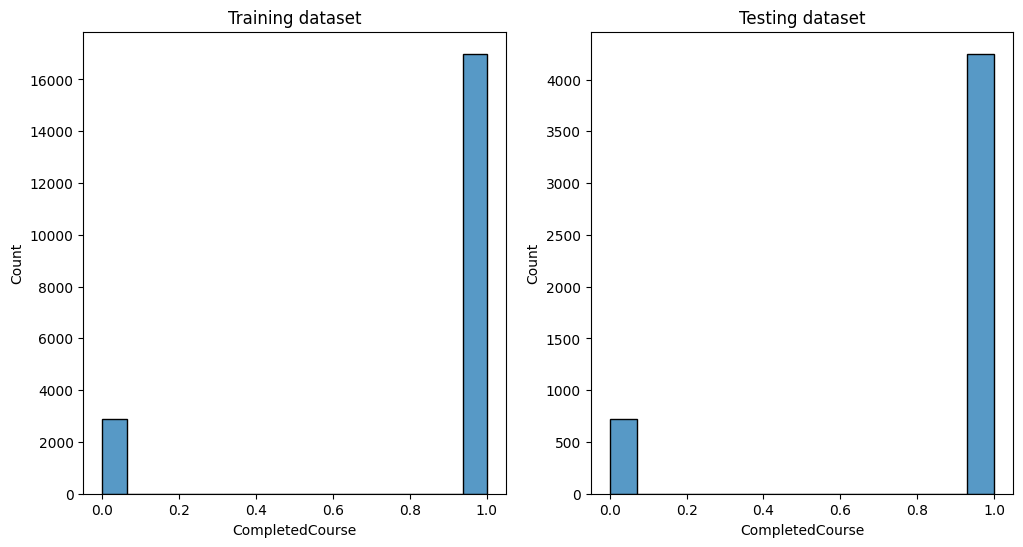

In [ ]:
# Train test split and class balance check
X = xgb_encoded_s2.drop('CompletedCourse', axis=1)
y = xgb_encoded_s2['CompletedCourse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

print('Train data')
print(y_train.value_counts(normalize=True))
print('Test data')
print(y_test.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_train, ax=ax[0])
ax[0].set_title('Training dataset')
sns.histplot(y_test, ax=ax[1])
ax[1].set_title('Testing dataset')
plt.show()

In [ ]:
# TRAIN XGBOOST CLASSIFIER
xgb_clf = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed)

xgb_clf.fit(X_train, y_train)

#Classify
y_pred = xgb_clf.predict(X_test)


XGBoost Accuracy: 0.9115
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       722
           1       0.93      0.96      0.95      4249

    accuracy                           0.91      4971
   macro avg       0.84      0.78      0.81      4971
weighted avg       0.91      0.91      0.91      4971

AUC: 0.7821


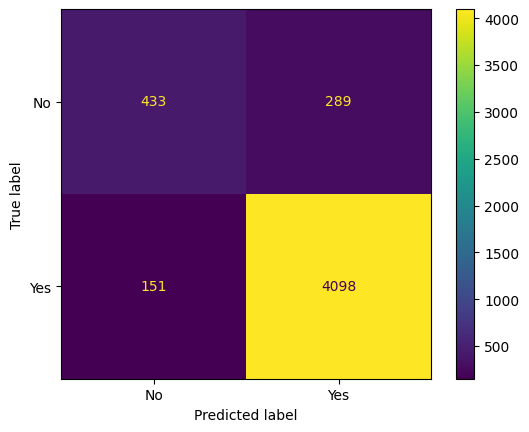

In [ ]:
# EVALUATE

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

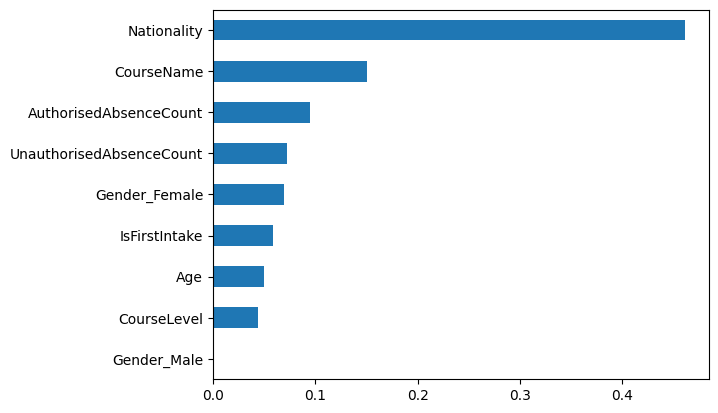

In [ ]:
feature_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

In [ ]:
# HYPERPARAMETER TUNING

parameter_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]
}

# Tuned model
xgb_clf_tuned = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed)

grid_search = GridSearchCV(
    estimator=xgb_clf_tuned,
    param_grid=parameter_grid,
    scoring='roc_auc', # imbalanced dataset
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
# define the model with the best parameters
xgb_clf_tuned = grid_search.best_estimator_

print(xgb_clf_tuned)

# predict
y_pred = xgb_clf_tuned.predict(X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


XGBoost Accuracy: 0.9059
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       722
           1       0.93      0.96      0.95      4249

    accuracy                           0.91      4971
   macro avg       0.82      0.78      0.80      4971
weighted avg       0.90      0.91      0.90      4971

AUC: 0.7776


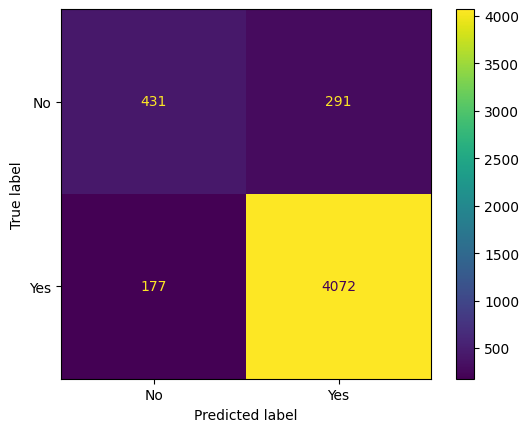

In [ ]:
# EVALUATE

# confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

**Analysis:** After performing XGBoost classification, it was clear that the dominant deciding features were yet again Nationality and CourseName. However, their removal significantly decreased the model's performance, especially considering recall and AUC, which are important features in this case. For this reason the two dominant features are kept in regardless. Furthermore, the model's reliance on the dominant feature is smaller than it was in the previous stage, indicating that the model is making a more balanced decision for classification.

The good news is that after Nationality and CourseName, the features with the largest effect were the added features on absence counts. Authorised absences having a slightly larger power over the decision.

Regarding Hyperparameter optimisation, performance did not improve. In fact, the best model found in the grid search was outperformed by the raw model. Comparing the models to the previous stage, including the absence data improved metrics across the board for XGBoost. Though this improvement was small, it did push accuracy over the 90% mark and consistently improved AUC.

**Reasoning:** The reason for the improvement in the model performance is likely due to the fact that the absence data is a direct indicator of student engagement. Engagement is a key factor in determining student success and therefore a key feature in predicting student dropout. Taking this factor into account should have a positive impact on the model's classification confidence, a hypothesis that is supported by the increased F1-Score.

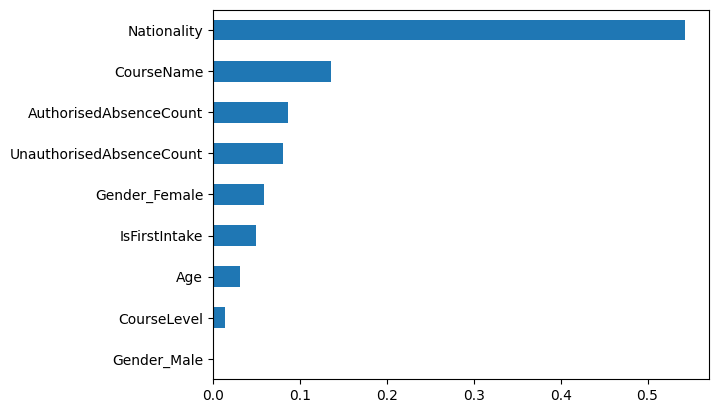

In [ ]:
feature_importance = pd.Series(xgb_clf_tuned.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

Hyperparameter tuning heavily affected feature importance, increasing the effect of nationality to over the 0.5 mark.

## Neural Network Stage 2


In [ ]:
# PREPARING DATA FOR NN

nn_encoded_s2 = stage_2.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
nn_encoded_s2['IsFirstIntake'] = nn_encoded_s2['IsFirstIntake'].astype(int)
nn_encoded_s2['CompletedCourse'] = nn_encoded_s2['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
nn_encoded_s2['CourseLevel'] = nn_encoded_s2['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
nn_encoded_s2 = pd.get_dummies(nn_encoded_s2, columns=['Gender'])
nn_encoded_s2['Gender_Female'] = nn_encoded_s2['Gender_Female'].astype(int)
nn_encoded_s2['Gender_Male'] = nn_encoded_s2['Gender_Male'].astype(int)

# Encoding Nationality and CourseName
# Nationality
nat_encoder = LabelEncoder()
nn_encoded_s2['Nationality_ID'] = nat_encoder.fit_transform(nn_encoded_s2['Nationality'])
# CourseName
course_encoder = LabelEncoder()
nn_encoded_s2['CourseName_ID'] = course_encoder.fit_transform(nn_encoded_s2['CourseName'])

# removing the old columns
nn_encoded_s2.drop(columns=['Nationality', 'CourseName'], inplace=True)

# remove nans from UnauthorisedAbsenceCount
nn_encoded_s2.dropna(subset=['UnauthorisedAbsenceCount'], inplace=True)

# nn_encoded_s2.info()
# nn_encoded_s2.head()

# Train test split
X = nn_encoded_s2.drop('CompletedCourse', axis=1)
y = nn_encoded_s2['CompletedCourse']

# train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
# train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=random_seed, stratify=y_train_full)

/var/folders/12/wd9t8m850v12fpd_v81hh2hm0000gn/T/ipykernel_73605/3865659041.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nn_encoded_s2['CompletedCourse'] = nn_encoded_s2['CompletedCourse'].replace({'Yes': 1, 'No': 0})


In [ ]:
# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

embedding_dim = 10

# Inputs
nationality_input = Input(shape=(1,), name='Nationality_In')
course_input = Input(shape=(1,), name='Course_In')
# all features except the embedded ones
other_input = Input(shape=(X_train.shape[1] - 2,), name='Other_Features_In')

# Embeddings
# Nationality
nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
nationality_embedding = Flatten()(nationality_embedding) # flatten to turn into 'layer'

# Course
course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
course_embedding = Flatten()(course_embedding)
# Concat inputs
input = Concatenate()([nationality_embedding, course_embedding, other_input])

# Dense layers
x = Dense(32, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)

# OUtput layer
output = Dense(1, activation='sigmoid', name="Output")(x)

# Create Model
model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['AUC'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Nationality_In      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_In           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Nationality_Embedd… │ (None, 1, 10)     │      1,510 │ Nationality_In[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_Embedding    │ (None, 1, 10)     │      1,720 │ Course_In[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 10)        │          0 │ Nationality_Embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 10)        │          0 │ Course_Embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Other_Features_In   │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 27)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ Other_Features_I… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        896 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         17 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,671 (18.25 KB)

 Trainable params: 4,671 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - AUC: 0.4883 - loss: 2.5189 - val_AUC: 0.6256 - val_loss: 0.7921
Epoch 2/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - AUC: 0.5619 - loss: 1.3930 - val_AUC: 0.7707 - val_loss: 0.5131
Epoch 3/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - AUC: 0.6086 - loss: 0.9459 - val_AUC: 0.7920 - val_loss: 0.4021
Epoch 4/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - AUC: 0.6457 - loss: 0.6902 - val_AUC: 0.8132 - val_loss: 0.3499
Epoch 5/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - AUC: 0.6570 - loss: 0.6008 - val_AUC: 0.8120 - val_loss: 0.3493
Epoch 6/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - AUC: 0.6766 - loss: 0.5418 - val_AUC: 0.8118 - val_loss: 0.3506
Epoch 7/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - AUC: 0.7015 - loss: 0.4778 - val_AUC: 0.8145 - val_loss: 0.3497
Epoch 8/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - AUC: 0.6967 - loss: 0.4502 - val_AUC: 0.8192 - val_loss: 0.3475
Epoch 9/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/st

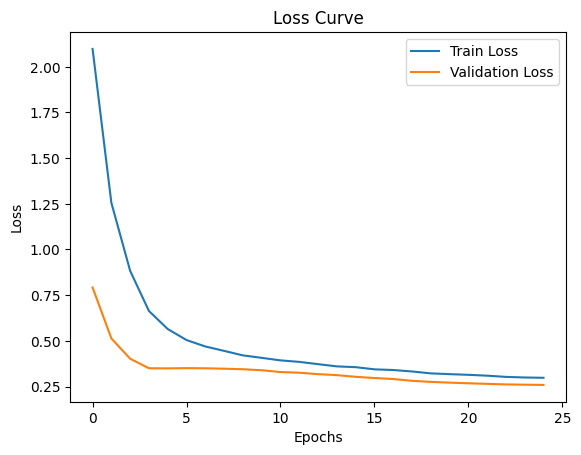

In [ ]:
# TRAINING
# Train data
X_nationality = X_train['Nationality_ID']
X_course = X_train['CourseName_ID']
X_other = X_train.drop(columns=['Nationality_ID', 'CourseName_ID'])

# test and validation data
X_test_nationality, X_val_nationality = X_test['Nationality_ID'], X_val['Nationality_ID']
X_test_course, X_val_course = X_test['CourseName_ID'], X_val['CourseName_ID']
X_test_other, X_val_other = X_test.drop(columns=['Nationality_ID', 'CourseName_ID']), X_val.drop(columns=['Nationality_ID', 'CourseName_ID'])

nn_model = model.fit(
    [X_nationality, X_course, X_other],
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val)
)

# Plot training & validation accuracy/loss
plt.plot(nn_model.history['loss'], label='Train Loss')
plt.plot(nn_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
# classify
y_pred = model.predict([X_test_nationality, X_test_course, X_test_other])
y_pred = (y_pred > 0.5).astype(int)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


NN2 Accuracy: 0.8964


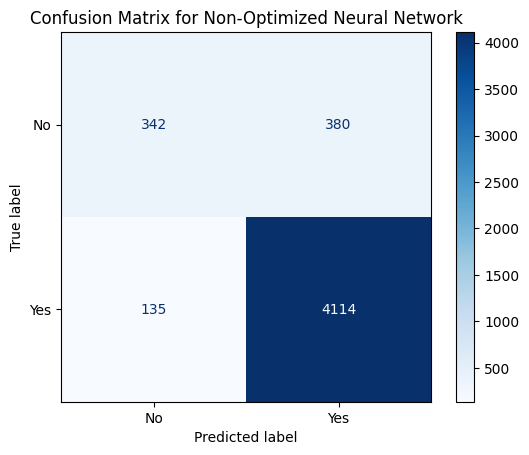

              precision    recall  f1-score   support

           0       0.72      0.47      0.57       722
           1       0.92      0.97      0.94      4249

    accuracy                           0.90      4971
   macro avg       0.82      0.72      0.76      4971
weighted avg       0.89      0.90      0.89      4971

AUC: 0.7210


In [ ]:
# EVALUATE

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'NN2 Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Non-Optimized Neural Network")
plt.show()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

**Analysis:** The same can be observed for the Neural Network model. The model has improved across the board (albeit a consistently small improvement). The most significant improvements can be seen on the F1-Score of students who dropped out and the AUC.

In [ ]:
# HYPERPARAMETER TUNING

# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

def build_model(hp):
    """
    This function builds a neural network model with specified hyperparameters.
    """
    embedding_dim = hp.Int('embedding_dim', min_value=5, max_value=25, step=5)

    # Inputs
    nationality_input = Input(shape=(1,), name='Nationality_In')
    course_input = Input(shape=(1,), name='Course_In')
    other_input = Input(shape=(X_train_full.shape[1] - 2,), name='Other_Features_In')

    # Embeddings
    nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
    nationality_embedding = Flatten()(nationality_embedding)

    course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
    course_embedding = Flatten()(course_embedding)

    # Combine all inputs
    merged = Concatenate()([nationality_embedding, course_embedding, other_input])

    # Tune number of neurons per layer
    x = Dense(
        hp.Int('units_1', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation_1', ['relu', 'tanh', 'leaky_relu'])
    )(merged)

    # Tune dropout rate
    x = Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)

    x = Dense(
        hp.Int('units_2', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation_2', ['relu', 'tanh', 'leaky_relu'])
    )(x)

    x = Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Output layer
    output = Dense(1, activation='sigmoid', name="Output")(x)

    # Tune optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])

    model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    return model

In [ ]:
# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_auc',  # Optimize for AUC
    max_trials=20,  # Number of different hyperparameter combinations to test
    executions_per_trial=2,  # Run each trial multiple times to get stable results
    directory='keras_tuner_results_stage2',
    project_name='nn_hyperparameter_tuning'
)

# Perform Hyperparameter Search
tuner.search(
    [X_nationality, X_course, X_other],
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=20,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', mode='max', patience=5, restore_best_weights=True)]
)

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
Embedding Dimension: {best_hps.get('embedding_dim')}
Units Layer 1: {best_hps.get('units_1')}
Activation Layer 1: {best_hps.get('activation_1')}
Dropout Layer 1: {best_hps.get('dropout_1')}
Units Layer 2: {best_hps.get('units_2')}
Activation Layer 2: {best_hps.get('activation_2')}
Dropout Layer 2: {best_hps.get('dropout_2')}
Optimizer: {best_hps.get('optimizer')}
""")

Trial 20 Complete [00h 00m 07s]
val_auc: 0.9009426534175873

Best val_auc So Far: 0.9105345606803894
Total elapsed time: 00h 03m 18s

Best hyperparameters:
Embedding Dimension: 25
Units Layer 1: 32
Activation Layer 1: relu
Dropout Layer 1: 0.30000000000000004
Units Layer 2: 96
Activation Layer 2: relu
Dropout Layer 2: 0.2
Optimizer: rmsprop



In [ ]:
# Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_nationality, X_course, X_other],
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', patience=5)]
)

# Evaluate performance on test set
test_auc = best_model.evaluate([X_test_nationality, X_test_course, X_test_other], y_test)[1]
print(f"Final Test AUC: {test_auc:.4f}")

Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - auc: 0.6501 - loss: 0.6624 - val_auc: 0.8926 - val_loss: 0.2645
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - auc: 0.8622 - loss: 0.2948 - val_auc: 0.8994 - val_loss: 0.2563
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - auc: 0.8786 - loss: 0.2714 - val_auc: 0.9033 - val_loss: 0.2499
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - auc: 0.8821 - loss: 0.2696 - val_auc: 0.9046 - val_loss: 0.2442
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - auc: 0.8924 - loss: 0.2594 - val_auc: 0.9057 - val_loss: 0.2442
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - auc: 0.8881 - loss: 0.2590 - val_auc: 0.9043 - val_loss: 0.2573
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - auc: 0.8907 - loss: 0.2549 - val_auc: 0.9065 - val_loss: 0.2416
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - auc: 0.8882 - loss: 0.2617 - val_auc: 0.9091 - val_loss: 0.2486
Epoch 9/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 

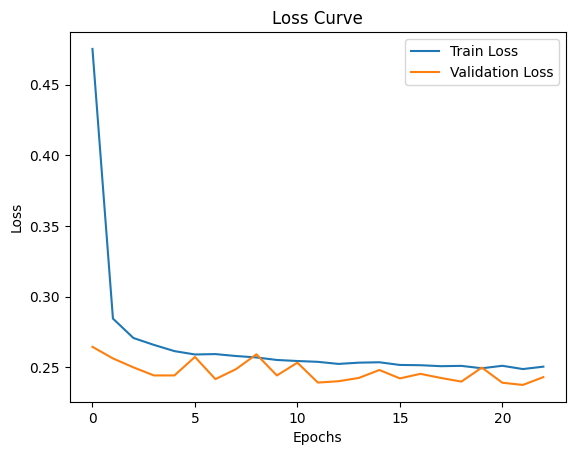

In [ ]:
# plot the loss of the model
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
0.9028364514182257


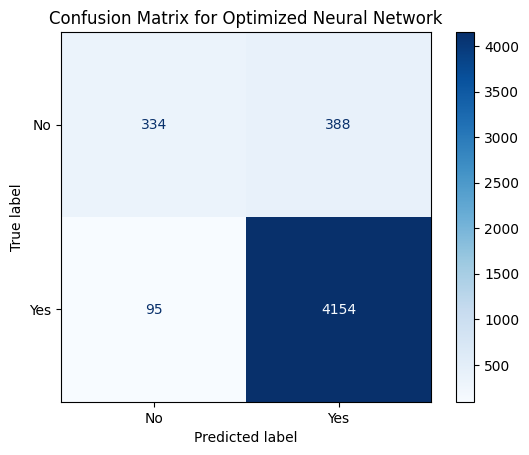

              precision    recall  f1-score   support

           0       0.78      0.46      0.58       722
           1       0.91      0.98      0.95      4249

    accuracy                           0.90      4971
   macro avg       0.85      0.72      0.76      4971
weighted avg       0.89      0.90      0.89      4971

AUC: 0.9004


In [ ]:
# EVALUATE
y_pred_prob = best_model.predict([X_test_nationality, X_test_course, X_test_other])

# Convert probabilities to binary class labels (threshold at 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap="Blues")
plt.title("Confusion Matrix for Optimized Neural Network")
plt.show()

print(classification_report(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

print(f'AUC: {auc_score:.4f}')

**Analysis:** F1-score slight improvement on both ends compared to non-optimised. AUC improved to record 0.9004. accuracy remained the same. The hugely improved AUC indicates that the model is generalizing well and is capable of making good predictions regardless of class imbalances.

Comparing stage 1 and stage 2, we notice that the true improvements happen after hyperparameter optimisation. Though this is the case, we should not forget the consistent postivie impact that the addition of absence data had on the models' perfomances. Absence data (as in the case for XGBoost) gives a reliable indication of whether a student will complete their course. This is a likely reason for the improved performance of the models in stage 2.

The performance improvements suggest that with a strong enough model, predictions of student course completion can be done reliably at both early and middle stages of a student's course. However, the current trend indicates that predictions become marginally more reliable as the student progresses through their course.

Regarding hyperparameters, the hidden layers decreased in size compared to stage 1 from 48 nodes to 32 nodes in the first layer and 128 to 96 in the second. This likely indicates that the added absence features were stronger, requiring less computing power to make a good prediction.

# Stage 3 data

In [4]:
# File URL
file_url = "https://drive.google.com/uc?id=18oyu-RQotQN6jaibsLBoPdqQJbj_cV2-"

stage_3 = pd.read_csv(file_url)
stage_3.head()

,CentreName,LearnerCode,BookingType,LeadSource,DiscountType,DateofBirth,Gender,Nationality,HomeState,HomeCity,...,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,ProgressionDegree,ProgressionUniversity,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
0,ISC_Aberdeen,2284932,Agent,Standard Agent Booking,NaN,13/01/1998,Male,Chinese,Jianye District; Jiangsu Province,Nanjing,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,Msc Econ Accounting and Investment Management,University of Aberdeen,NaN,NaN
1,ISC_Aberdeen,2399500,Agent,Standard Agent Booking,NaN,12/2/1998,Male,Chinese,NaN,Xi'an,...,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,BSc Biological Sciences,University of Aberdeen,93.0,5.0
2,ISC_Aberdeen,2424946,Agent,Standard Agent Booking,NaN,7/4/2000,Male,Chinese,NaN,Chengdu,...,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,MA Finance,University of Aberdeen,92.0,6.0
3,ISC_Aberdeen,2426583,Agent,Standard Agent Booking,NaN,18/05/1999,Male,Chinese,NaN,LIUYANG CITY ;CHANGSHA,...,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,MA Business Management,University of Aberdeen,67.0,15.0
4,ISC_Aberdeen,2434674,Agent,Standard Agent Booking,NaN,19/04/1996,Male,Chinese,NaN,Xiamen,...,Business and Law Pre-Masters,True,Yes,4.0,4.0,0.0,MSc International Business Management,University of Aberdeen,NaN,NaN


**Stage 3: Pre-processing instructions**

- Remove any columns not useful in the analysis (LearnerCode).
- Remove columns with high cardinality (use >200 unique values, as a guideline for this data set).
- Remove columns with >50% data missing.
- Perform ordinal encoding for ordinal data.
- Perform one-hot encoding for all other categorical data.
- Choose how to engage with rows that have missing values, which can be done in one of two ways for this project:
  *   Impute the rows with appropriate values.
  *   Remove rows with missing values but ONLY in cases where rows with missing values are minimal: <2% of the overall data.






In [5]:
for col in stage_3.columns:
    print(col, stage_3[col].nunique())

CentreName 19
LearnerCode 24877
BookingType 2
LeadSource 7
DiscountType 11
DateofBirth 4705
Gender 2
Nationality 151
HomeState 2448
HomeCity 5881
CourseLevel 4
CourseName 172
IsFirstIntake 2
CompletedCourse 2
AssessedModules 12
PassedModules 12
FailedModules 11
ProgressionDegree 2616
ProgressionUniversity 40
AuthorisedAbsenceCount 190
UnauthorisedAbsenceCount 258


In [6]:
stage_3.drop(['LearnerCode', 'CentreName', 'BookingType', 'LeadSource', 'ProgressionDegree', 'ProgressionUniversity'], axis=1, inplace=True)
stage_3['DateofBirth'] = pd.to_datetime(stage_3['DateofBirth'], dayfirst=True)
stage_3['Age'] = (pd.to_datetime('today') - stage_3['DateofBirth']).dt.days // 365
age = stage_3.pop('Age')
stage_3.insert(4, 'Age', age)
stage_3.drop(['DateofBirth', 'HomeState', 'HomeCity', 'DiscountType'], axis=1, inplace=True)
stage_3.dropna(subset=['UnauthorisedAbsenceCount'], inplace=True)
stage_3.head()

,Gender,Nationality,Age,CourseLevel,CourseName,IsFirstIntake,CompletedCourse,AssessedModules,PassedModules,FailedModules,AuthorisedAbsenceCount,UnauthorisedAbsenceCount
1,Male,Chinese,27,Foundation,Life Sciences Undergraduate Foundation Programme,False,Yes,7.0,7.0,0.0,93.0,5.0
2,Male,Chinese,24,International Year Two,Business Management and Finance International ...,False,Yes,8.0,8.0,0.0,92.0,6.0
3,Male,Chinese,25,International Year Two,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,67.0,15.0
5,Male,Chinese,24,International Year Two,Business Management and Finance International ...,True,Yes,8.0,8.0,0.0,67.0,3.0
6,Male,Chinese,22,Foundation,Business; Economics; Accounting and Real Estat...,False,No,NaN,NaN,NaN,29.0,18.0


In [7]:
stage_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    24851 non-null  object 
 1   Nationality               24851 non-null  object 
 2   Age                       24851 non-null  int64  
 3   CourseLevel               24851 non-null  object 
 4   CourseName                24851 non-null  object 
 5   IsFirstIntake             24851 non-null  bool   
 6   CompletedCourse           24851 non-null  object 
 7   AssessedModules           22749 non-null  float64
 8   PassedModules             22749 non-null  float64
 9   FailedModules             22749 non-null  float64
 10  AuthorisedAbsenceCount    24851 non-null  float64
 11  UnauthorisedAbsenceCount  24851 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(5)
memory usage: 2.3+ MB


In [8]:
22749/24851

0.9154158786366746

**Justification:** Because there is more than 2% missing values in the student performance metrics, the relevant instances cannot be removed. However, this is very convenient since not all courses have assessmtent data. This means that the missing values are not due to a lack of data but rather due to the nature of the course. For this reason, the missing values will be imputed as 0.

In [9]:
stage_3['AssessedModules'] = stage_3['AssessedModules'].fillna(0)
stage_3['PassedModules'] = stage_3['PassedModules'].fillna(0)
stage_3['FailedModules'] = stage_3['FailedModules'].fillna(0)

In [58]:
xgb_encoded_s3 = stage_3.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
xgb_encoded_s3['IsFirstIntake'] = xgb_encoded_s3['IsFirstIntake'].astype(int)
xgb_encoded_s3['CompletedCourse'] = xgb_encoded_s3['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
xgb_encoded_s3['CourseLevel'] = xgb_encoded_s3['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
xgb_encoded_s3 = pd.get_dummies(xgb_encoded_s3, columns=['Gender'])
xgb_encoded_s3['Gender_Female'] = xgb_encoded_s3['Gender_Female'].astype(int)
xgb_encoded_s3['Gender_Male'] = xgb_encoded_s3['Gender_Male'].astype(int)

# Encoding Nationality and CourseName to individual categories
xgb_encoded_s3['Nationality'] = xgb_encoded_s3['Nationality'].astype('category')
xgb_encoded_s3['CourseName'] = xgb_encoded_s3['CourseName'].astype('category')

# # Drop nationality
# xgb_encoded_s3.drop('Nationality', axis=1, inplace=True)
# # Drop course name
# xgb_encoded_s3.drop('CourseName', axis=1, inplace=True)

# creating a combined feature from passedModules and AssessedModules called PerformanceScore
xgb_encoded_s3['PerformanceScore'] = np.where(
    xgb_encoded_s3['PassedModules'] == 0,
    0,
    xgb_encoded_s3['PassedModules'] / xgb_encoded_s3['AssessedModules']
)

scaler = MinMaxScaler()
xgb_encoded_s3[['PerformanceScore']] = scaler.fit_transform(xgb_encoded_s3[['PerformanceScore']])

# drop PassedModules
xgb_encoded_s3.drop('PassedModules', axis=1, inplace=True)
# drop AssessedModules
xgb_encoded_s3.drop('AssessedModules', axis=1, inplace=True)

# xgb_encoded_s3.head()
xgb_encoded_s3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Nationality               24851 non-null  category
 1   Age                       24851 non-null  int64   
 2   CourseLevel               24851 non-null  int64   
 3   CourseName                24851 non-null  category
 4   IsFirstIntake             24851 non-null  int64   
 5   CompletedCourse           24851 non-null  int64   
 6   FailedModules             24851 non-null  float64 
 7   AuthorisedAbsenceCount    24851 non-null  float64 
 8   UnauthorisedAbsenceCount  24851 non-null  float64 
 9   Gender_Female             24851 non-null  int64   
 10  Gender_Male               24851 non-null  int64   
 11  PerformanceScore          24851 non-null  float64 
dtypes: category(2), float64(4), int64(6)
memory usage: 2.2 MB


<ipython-input-58-99bec0ec60ed>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xgb_encoded_s3['CompletedCourse'] = xgb_encoded_s3['CompletedCourse'].replace({'Yes': 1, 'No': 0})


**Processing complete**

Now we are done with the pre-processing of the data. We have removed all irrelevant features, engineered the **Age** feature, removed rows with missing data, one-hot encoded relevant categorical data. The data is now ready for the next stage of the analysis.

Train data
CompletedCourse
1    0.854779
0    0.145221
Name: proportion, dtype: float64
Test data
CompletedCourse
1    0.854758
0    0.145242
Name: proportion, dtype: float64


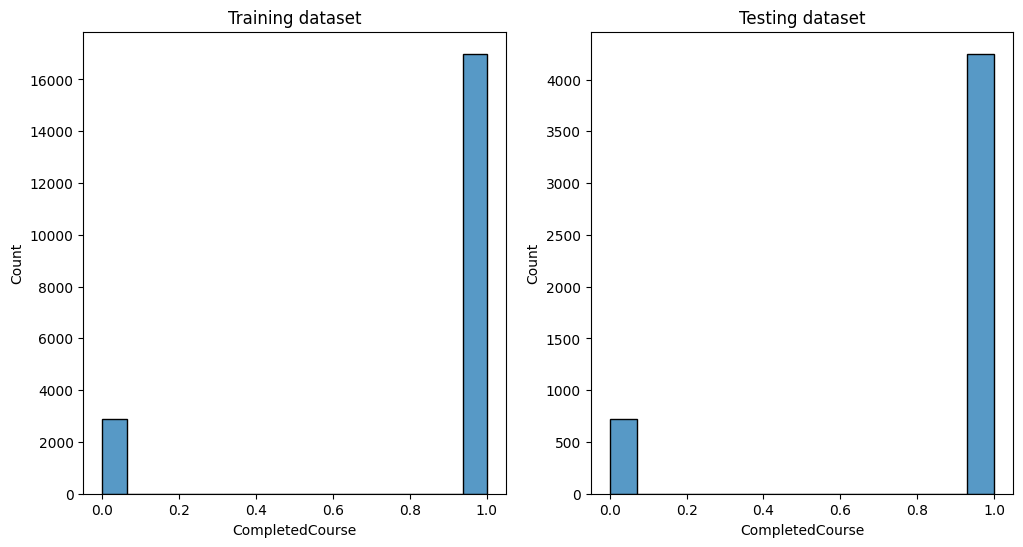

In [59]:
# Train test split and class balance check
X = xgb_encoded_s3.drop('CompletedCourse', axis=1)
y = xgb_encoded_s3['CompletedCourse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

print('Train data')
print(y_train.value_counts(normalize=True))
print('Test data')
print(y_test.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_train, ax=ax[0])
ax[0].set_title('Training dataset')
sns.histplot(y_test, ax=ax[1])
ax[1].set_title('Testing dataset')
plt.show()

Data distribution looks good (imbalanced but nothing unexpected)

In [63]:
# TRAIN XGBOOST CLASSIFIER
xgb_clf = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed, colsample_bytree=0.05)

xgb_clf.fit(X_train, y_train)

#Classify
y_pred = xgb_clf.predict(X_test)

XGBoost Accuracy: 0.9716
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       722
           1       0.98      0.98      0.98      4249

    accuracy                           0.97      4971
   macro avg       0.94      0.94      0.94      4971
weighted avg       0.97      0.97      0.97      4971

AUC: 0.9414


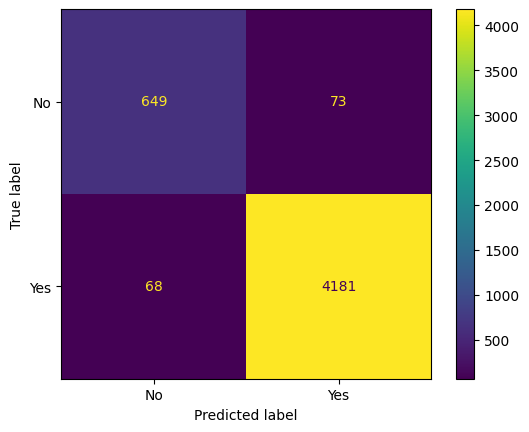

In [64]:
# EVALUATE

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

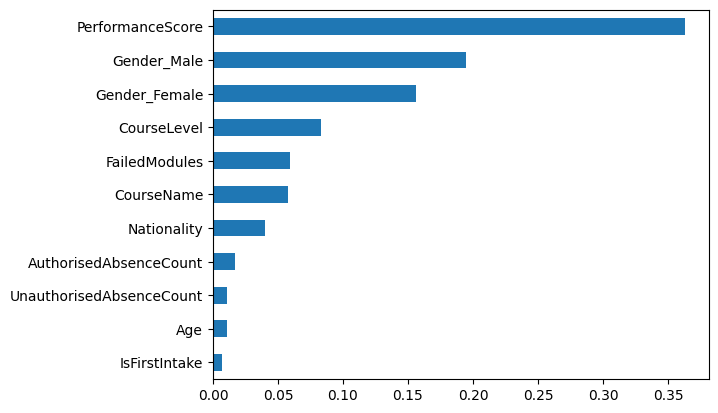

In [66]:
feature_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

**Analysis:** This is where we really see XGBoost flourish. The model thrives on features that have a direct correlation with the target feature. This phenomenon could be seen in the previous stage but the number of passed modules is obviously going to take the cake on this one, which can be seen in the feature importance graph.

PassedModules has an EXTREME preference over all other features. Following that are AssessedModules and Nationality. Removing these top three features gives similar performance as the non-optimised XGBoost model from stage 2. However, it would be a shame to miss out on the kind of performance that can be gained from the added features so some feature engineering will be performed.

PassedModules and AssessedModules were combined into a single feature called PerformanceScore, this reduces the over reliance on PassedModules. PerformanceScore was further scaled using the Min Max scaler. Because the **PerformanceScore** was still the dominant deciding feature after scaling, I tried adjusting the feature sampling of the model. Setting **colsample_bytree = 0.05** equalised the data much more. at this point the performance is still very good but there are more features being taken into account for the decision.

In summary, adding performance data for each student significantly improved the XGBoost model's performance. These metrics are clearly very directly correlated with a student's likelihood to complete their course.

In [67]:
parameter_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200]
}

# Tuned model
xgb_clf_tuned = xgb.XGBClassifier(enable_categorical=True, random_state=random_seed, colsample_bytree=0.05)

grid_search = GridSearchCV(
    estimator=xgb_clf_tuned,
    param_grid=parameter_grid,
    scoring='roc_auc', # imbalanced dataset
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [68]:
# define the model with the best parameters
xgb_clf_tuned = grid_search.best_estimator_

print(xgb_clf_tuned)

# predict
y_pred = xgb_clf_tuned.predict(X_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.05, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


XGBoost Accuracy: 0.9738
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       722
           1       0.98      0.98      0.98      4249

    accuracy                           0.97      4971
   macro avg       0.95      0.95      0.95      4971
weighted avg       0.97      0.97      0.97      4971

AUC: 0.9473


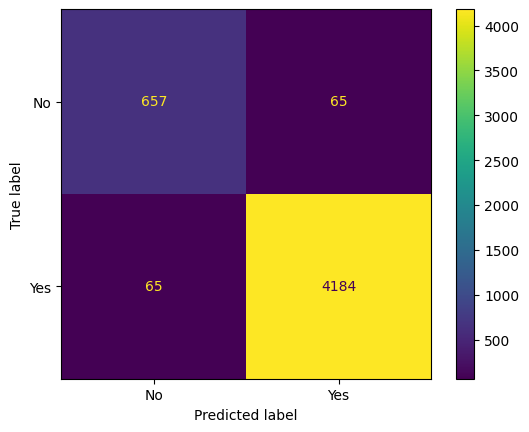

In [69]:
# EVALUATE

# confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

**Analysis:** As opposed to stage 2, the tuned model had marginally better performance. Since the performance of the original model is so good there is not much more room for improvement. That being said, there was some improvement.

notable as well is that performanceScore became more important for the tuned model.

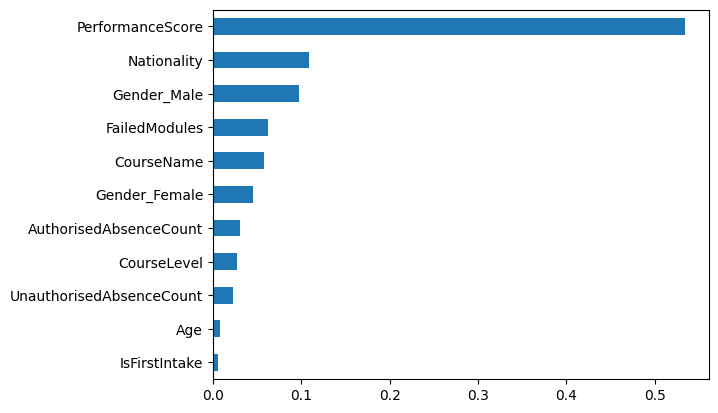

In [71]:
feature_importance = pd.Series(xgb_clf_tuned.feature_importances_, index=X_train.columns).sort_values()

feature_importance.plot.barh()
plt.show()

## Neural Network Stage 3

In [10]:
# PREPARING DATA FOR NN

nn_encoded_s3 = stage_3.copy() # Create a copy of the dataset

# Convert binary features to 1 and 0
nn_encoded_s3['IsFirstIntake'] = nn_encoded_s3['IsFirstIntake'].astype(int)
nn_encoded_s3['CompletedCourse'] = nn_encoded_s3['CompletedCourse'].replace({'Yes': 1, 'No': 0})

# Encoding CourseLevel (Ordinal)
course_level_map = {
    'Foundation' : 0,
    'International Year One' : 1,
    'International Year Two' : 2,
    'Pre-Masters' : 3}
nn_encoded_s3['CourseLevel'] = nn_encoded_s3['CourseLevel'].map(course_level_map)

# Encoding Gender (One-hot)
nn_encoded_s3 = pd.get_dummies(nn_encoded_s3, columns=['Gender'])
nn_encoded_s3['Gender_Female'] = nn_encoded_s3['Gender_Female'].astype(int)
nn_encoded_s3['Gender_Male'] = nn_encoded_s3['Gender_Male'].astype(int)

# Encoding Nationality and CourseName
# Nationality
nat_encoder = LabelEncoder()
nn_encoded_s3['Nationality_ID'] = nat_encoder.fit_transform(nn_encoded_s3['Nationality'])
# CourseName
course_encoder = LabelEncoder()
nn_encoded_s3['CourseName_ID'] = course_encoder.fit_transform(nn_encoded_s3['CourseName'])

# removing the old columns
nn_encoded_s3.drop(columns=['Nationality', 'CourseName'], inplace=True)

# remove nans from UnauthorisedAbsenceCount
nn_encoded_s3.dropna(subset=['UnauthorisedAbsenceCount'], inplace=True)

nn_encoded_s3.info()
# nn_encoded_s3.head()

# Train test split
X = nn_encoded_s3.drop('CompletedCourse', axis=1)
y = nn_encoded_s3['CompletedCourse']

# train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
# train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=random_seed, stratify=y_train_full)

<class 'pandas.core.frame.DataFrame'>
Index: 24851 entries, 1 to 25058
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       24851 non-null  int64  
 1   CourseLevel               24851 non-null  int64  
 2   IsFirstIntake             24851 non-null  int64  
 3   CompletedCourse           24851 non-null  int64  
 4   AssessedModules           24851 non-null  float64
 5   PassedModules             24851 non-null  float64
 6   FailedModules             24851 non-null  float64
 7   AuthorisedAbsenceCount    24851 non-null  float64
 8   UnauthorisedAbsenceCount  24851 non-null  float64
 9   Gender_Female             24851 non-null  int64  
 10  Gender_Male               24851 non-null  int64  
 11  Nationality_ID            24851 non-null  int64  
 12  CourseName_ID             24851 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.7 MB


/var/folders/12/wd9t8m850v12fpd_v81hh2hm0000gn/T/ipykernel_77543/1009507898.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nn_encoded_s3['CompletedCourse'] = nn_encoded_s3['CompletedCourse'].replace({'Yes': 1, 'No': 0})


In [11]:
# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

embedding_dim = 10

# Inputs
nationality_input = Input(shape=(1,), name='Nationality_In')
course_input = Input(shape=(1,), name='Course_In')
# all features except the embedded ones
other_input = Input(shape=(X_train.shape[1] - 2,), name='Other_Features_In')

# Embeddings
# Nationality
nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
nationality_embedding = Flatten()(nationality_embedding) # flatten to turn into 'layer'

# Course
course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
course_embedding = Flatten()(course_embedding)
# Concat inputs
input = Concatenate()([nationality_embedding, course_embedding, other_input])

# Dense layers
x = Dense(32, activation='relu')(input)
x = Dropout(0.3)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)

# OUtput layer
output = Dense(1, activation='sigmoid', name="Output")(x)

# Create Model
model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['AUC'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Nationality_In      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_In           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Nationality_Embedd… │ (None, 1, 10)     │      1,500 │ Nationality_In[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Course_Embedding    │ (None, 1, 10)     │      1,720 │ Course_In[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 10)        │          0 │ Nationality_Embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 10)        │          0 │ Course_Embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Other_Features_In   │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 30)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ Other_Features_I… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        992 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         17 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,757 (18.58 KB)

 Trainable params: 4,757 (18.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - AUC: 0.4625 - loss: 3.4978 - val_AUC: 0.3066 - val_loss: 1.0362
Epoch 2/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - AUC: 0.4979 - loss: 1.6318 - val_AUC: 0.6279 - val_loss: 0.5066
Epoch 3/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - AUC: 0.5900 - loss: 0.9808 - val_AUC: 0.9062 - val_loss: 0.2940
Epoch 4/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - AUC: 0.6586 - loss: 0.7119 - val_AUC: 0.9414 - val_loss: 0.2458
Epoch 5/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - AUC: 0.7461 - loss: 0.5122 - val_AUC: 0.9509 - val_loss: 0.2219
Epoch 6/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - AUC: 0.7782 - loss: 0.4361 - val_AUC: 0.9508 - val_loss: 0.2122
Epoch 7/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - AUC: 0.8299 - loss: 0.3731 - val_AUC: 0.9595 - val_loss: 0.1873
Epoch 8/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - AUC: 0.8504 - loss: 0.3359 - val_AUC: 0.9665 - val_loss: 0.1733
Epoch 9/25
497/497 ━━━━━━━━━━━━━━━━━━━━ 

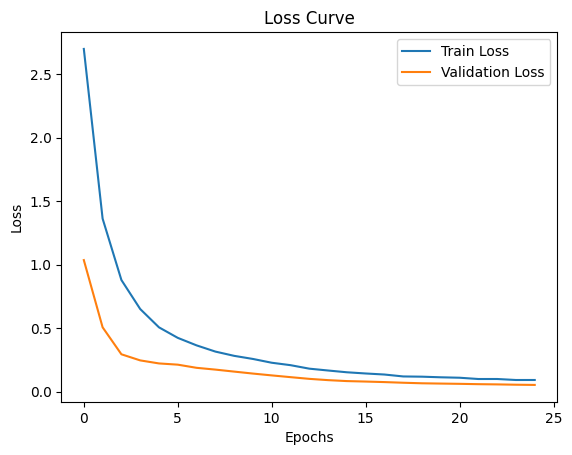

In [12]:
# TRAINING
# Train data
X_nationality = X_train['Nationality_ID']
X_course = X_train['CourseName_ID']
X_other = X_train.drop(columns=['Nationality_ID', 'CourseName_ID'])

# test and validation data
X_test_nationality, X_val_nationality = X_test['Nationality_ID'], X_val['Nationality_ID']
X_test_course, X_val_course = X_test['CourseName_ID'], X_val['CourseName_ID']
X_test_other, X_val_other = X_test.drop(columns=['Nationality_ID', 'CourseName_ID']), X_val.drop(columns=['Nationality_ID', 'CourseName_ID'])

nn_model = model.fit(
    [X_nationality, X_course, X_other],
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val)
)

# Plot training & validation accuracy/loss
plt.plot(nn_model.history['loss'], label='Train Loss')
plt.plot(nn_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [13]:
# classify
y_pred = model.predict([X_test_nationality, X_test_course, X_test_other])
y_pred = (y_pred > 0.5).astype(int)

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


NN3 Accuracy: 0.9714


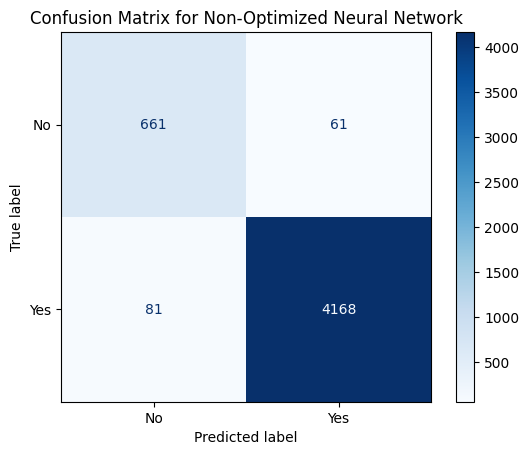

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       722
           1       0.99      0.98      0.98      4249

    accuracy                           0.97      4971
   macro avg       0.94      0.95      0.94      4971
weighted avg       0.97      0.97      0.97      4971

AUC: 0.9482


In [14]:
# EVALUATE

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'NN3 Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap='Blues')
plt.title("Confusion Matrix for Non-Optimized Neural Network")
plt.show()


# Classification Report
print(classification_report(y_test, y_pred))

# AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f'AUC: {auc_score:.4f}')

**Analysis:** As for the NN model... because the added features function as a direct indicator of a student's actual ability to meet academic demands, performance has increased significantly compared to stage 2. 

In [15]:
# HYPERPARAMETER TUNING

# Cardinality check -> input size
num_nationalities = len(nat_encoder.classes_)
num_courses = len(course_encoder.classes_)

def build_model(hp):
    """
    This function builds a neural network model with specified hyperparameters.
    """
    embedding_dim = hp.Int('embedding_dim', min_value=5, max_value=25, step=5)

    # Inputs
    nationality_input = Input(shape=(1,), name='Nationality_In')
    course_input = Input(shape=(1,), name='Course_In')
    other_input = Input(shape=(X_train_full.shape[1] - 2,), name='Other_Features_In')

    # Embeddings
    nationality_embedding = Embedding(input_dim=num_nationalities, output_dim=embedding_dim, name="Nationality_Embedding")(nationality_input)
    nationality_embedding = Flatten()(nationality_embedding)

    course_embedding = Embedding(input_dim=num_courses, output_dim=embedding_dim, name="Course_Embedding")(course_input)
    course_embedding = Flatten()(course_embedding)

    # Combine all inputs
    merged = Concatenate()([nationality_embedding, course_embedding, other_input])

    # Tune number of neurons per layer
    x = Dense(
        hp.Int('units_1', min_value=16, max_value=128, step=16), 
        activation=hp.Choice('activation_1', ['relu', 'tanh', 'leaky_relu'])
    )(merged)

    # Tune dropout rate
    x = Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)

    x = Dense(
        hp.Int('units_2', min_value=16, max_value=128, step=16), 
        activation=hp.Choice('activation_2', ['relu', 'tanh', 'leaky_relu'])
    )(x)

    x = Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Output layer
    output = Dense(1, activation='sigmoid', name="Output")(x)

    # Tune optimizer
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])

    model = Model(inputs=[nationality_input, course_input, other_input], outputs=output)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='auc')])

    return model

In [16]:
# Initialize Hyperparameter Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_auc',  # Optimize for AUC
    max_trials=20,  # Number of different hyperparameter combinations to test
    executions_per_trial=2,  # Run each trial multiple times to get stable results
    directory='keras_tuner_results_stage3',
    project_name='nn_hyperparameter_tuning'
)

# Perform Hyperparameter Search
tuner.search(
    [X_nationality, X_course, X_other], 
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=20,  
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', mode='max', patience=5, restore_best_weights=True)]
)

# Get Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
Embedding Dimension: {best_hps.get('embedding_dim')}
Units Layer 1: {best_hps.get('units_1')}
Activation Layer 1: {best_hps.get('activation_1')}
Dropout Layer 1: {best_hps.get('dropout_1')}
Units Layer 2: {best_hps.get('units_2')}
Activation Layer 2: {best_hps.get('activation_2')}
Dropout Layer 2: {best_hps.get('dropout_2')}
Optimizer: {best_hps.get('optimizer')}
""")

Trial 20 Complete [00h 00m 04s]
val_auc: 0.9958077371120453

Best val_auc So Far: 0.9989144802093506
Total elapsed time: 00h 02m 59s

Best hyperparameters:
Embedding Dimension: 15
Units Layer 1: 16
Activation Layer 1: leaky_relu
Dropout Layer 1: 0.4
Units Layer 2: 64
Activation Layer 2: leaky_relu
Dropout Layer 2: 0.4
Optimizer: adam



In [17]:
# Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_nationality, X_course, X_other], 
    y_train,
    validation_data=([X_val_nationality, X_val_course, X_val_other], y_val),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_auc', patience=5)]
)

# Evaluate performance on test set
test_auc = best_model.evaluate([X_test_nationality, X_test_course, X_test_other], y_test)[1]
print(f"Final Test AUC: {test_auc:.4f}")

Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - auc: 0.7037 - loss: 0.9781 - val_auc: 0.9859 - val_loss: 0.0929
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - auc: 0.9550 - loss: 0.1816 - val_auc: 0.9949 - val_loss: 0.0556
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - auc: 0.9853 - loss: 0.0965 - val_auc: 0.9971 - val_loss: 0.0425
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - auc: 0.9908 - loss: 0.0776 - val_auc: 0.9984 - val_loss: 0.0351
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - auc: 0.9932 - loss: 0.0619 - val_auc: 0.9977 - val_loss: 0.0362
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - auc: 0.9934 - loss: 0.0590 - val_auc: 0.9970 - val_loss: 0.0331
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - auc: 0.9943 - loss: 0.0503 - val_auc: 0.9987 - val_loss: 0.0317
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - auc: 0.9952 - loss: 0.0451 - val_auc: 0.9980 - val_loss: 0.0309
Epoch 9/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 

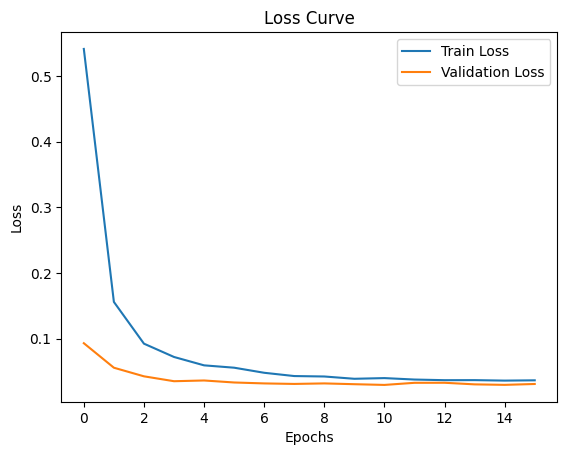

In [18]:
# plot the loss of the model
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
0.9847113256889962


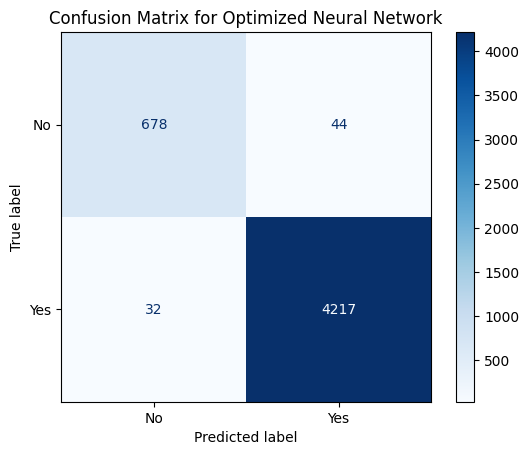

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       722
           1       0.99      0.99      0.99      4249

    accuracy                           0.98      4971
   macro avg       0.97      0.97      0.97      4971
weighted avg       0.98      0.98      0.98      4971

AUC: 0.9971


In [19]:
# EVALUATE
y_pred_prob = best_model.predict([X_test_nationality, X_test_course, X_test_other])

# Convert probabilities to binary class labels (threshold at 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
cfmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
cfmd.plot(cmap="Blues")
plt.title("Confusion Matrix for Optimized Neural Network")
plt.show()

print(classification_report(y_test, y_pred))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

print(f'AUC: {auc_score:.4f}')

**Analysis:** As expected by this point, the tuned neural network model has given close to perfect results. With the help of the added direct indicators to student success, the model has reached its best result yet, with a test AUC of 0.9971. In other words, regardless of an imbalanced dataset, the model is capable of generalising almost perfectly. 

An interesting observation regarding the hyperparameters in stage 3 is the increase in dropout rate (0.4) in both drop out layers. It is very likely that the new metrics were causing overfitting which would explain why the network performed best with such a high dropout rate. This is also theonoy layer with the Adam optimizer, which would allow for faster convergence, which would be helped by the direct features.

Layer sizes also decreased consistently with each stage. Stage 3 ended up having 16 nodes in the first and 64 in the second layer, whereas stage 2 had 32 and 96 respectively. When stringer features were added, the network needed less nodes to make a good prediction.

# Declaration
By submitting your project, you indicate that the work is your own and has been created with academic integrity. Refer to the **Cambridge plagiarism regulations**.
